# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv("states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
#rename
# let's rename our columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.head()


,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: GRADE 4 MATH

How many years of data are logged in our dataset? 

In [5]:
years = df['YEAR'].nunique()
print(f'There are {years} unique years logged in the dataset.')

There are 33 unique years logged in the dataset.


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [6]:
Mi_avg = df[df['STATE'] == 'MICHIGAN']['AVG_MATH_4_SCORE'].mean()
Oh_avg = df[df['STATE'] == 'OHIO']['AVG_MATH_4_SCORE'].mean()

if Mi_avg > Oh_avg:
    print("MI higher")
elif Mi_avg == Oh_avg:
    print("equal higher")
else:
    print("OH higher")


OH higher


Find the average for your outcome score across all states in 2019

In [7]:
df19 = df[df['YEAR'] == 2019]['AVG_MATH_4_SCORE'].mean()
print(f"The 2019 score is {df19: .2f}")

The 2019 score is  239.94


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [8]:
score = df.groupby('STATE')['AVG_MATH_4_SCORE'].max()

print(score)

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [9]:
df.dropna(inplace=True)
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
# avg_math = df['AVG_MATH_4_SCORE'].mean()
# df['AVG_MATH_4_SCORE'].fillna(avg_math, inplace=True)
print(df.shape)
df['ENROLL_ALL'] = df['ENROLL_ALL'].fillna(df["ENROLL_PREK"]+df["ENROLL_PRIMARY"]+df["ENROLL_HS"])
df[df.ENROLL_ALL_EST.isna()]["ENROLL_ALL"].notna().sum()
((df["ENROLL_ALL"] - df["ENROLL_ALL_EST"])/df["ENROLL_ALL"]).describe()
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])

df["expense_per_stu"] = df["TOTAL_EXPENDITURE"] / df["ENROLL_ALL"]
# let's create a new column which represents expenditure per student
df.head()

(355, 25)


,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,expense_per_stu
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0,7.246700
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0,12.023094
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0,6.136235
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0,7.134510
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0,9.315735


Feature engineering justification: I add a new feature called "expense_per_student". I think the overall expenditure might also influence the math scores of students. That is becuase with more expenditure, the school would have higher possibility to hire professional teachers and improve the education infrastructures.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**
"Grade_4_math vs. Expense per Student by State"
In the graph, we could see that the higher expense for students might not lead to higher grade. However, most of students who have higher math grade are centralized to expense 15 dolloars per students.

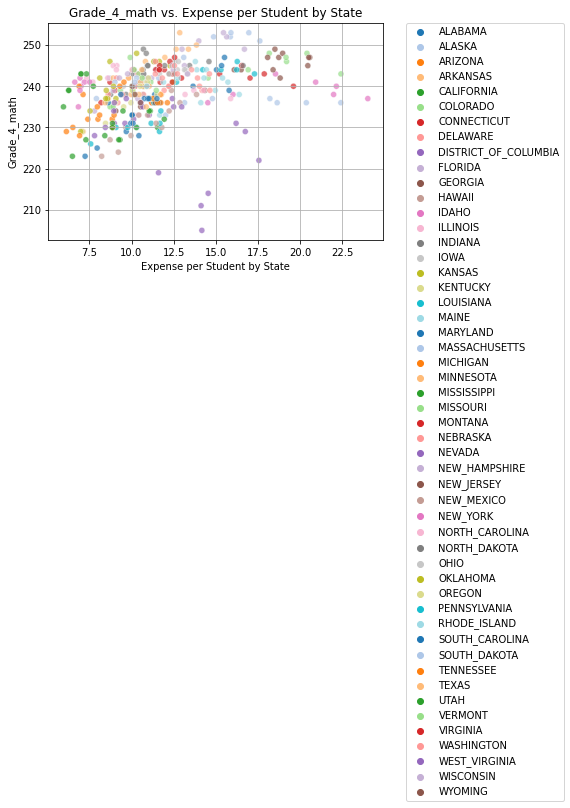

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Scatter plot
sns.scatterplot(data=df, x='expense_per_stu', y='AVG_MATH_4_SCORE', hue='STATE', palette='tab20', alpha=0.7)
plt.title('Grade_4_math vs. Expense per Student by State')
plt.xlabel('Expense per Student by State')
plt.ylabel('Grade_4_math')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.07, 1), loc=2, borderaxespad=0.)
plt.show()

**<Grade_4_math vs. Expense per Student by State>**

**Visualization 2**
"Grade_4_math vs. Grade_4_Reading"
In the graph, we can see with higher the reading scores, the students would get higher math score. It is make sense science the math problem also involve with the reading understanding.

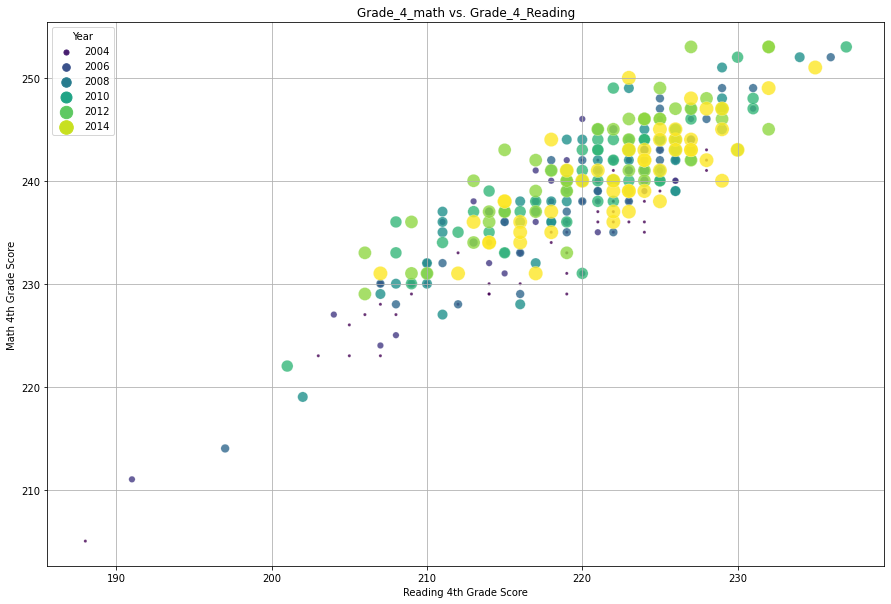

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

# Scatter plot comparing AVG_READING_4_SCORE to AVG_MATH_4_SCORE
sns.scatterplot(data=df, x='AVG_READING_4_SCORE', y='AVG_MATH_4_SCORE', hue='YEAR', palette='viridis', size='YEAR', sizes=(10,200), alpha=0.8)

plt.title('Grade_4_math vs. Grade_4_Reading')
plt.xlabel('Reading 4th Grade Score')
plt.ylabel('Math 4th Grade Score')
plt.grid(True)
plt.legend(loc='upper left', title='Year')
plt.show()


**<Grade_4_math vs. Grade_4_Reading>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [11]:
from sklearn.model_selection import train_test_split

In [15]:
X = df[['ENROLL_4','expense_per_stu','AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [16]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
y.fillna(y.median(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [17]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [18]:
# create your model here
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [21]:
print(model.intercept_)
print(model.coef_)
model.score(X_test, y_test)

# mean error
np.mean(model.predict(X_test)-y_test)

# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

49.76088687061596
[2.47482655e-06 2.51888151e-02 8.57607469e-01]


3.5082887302999555

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

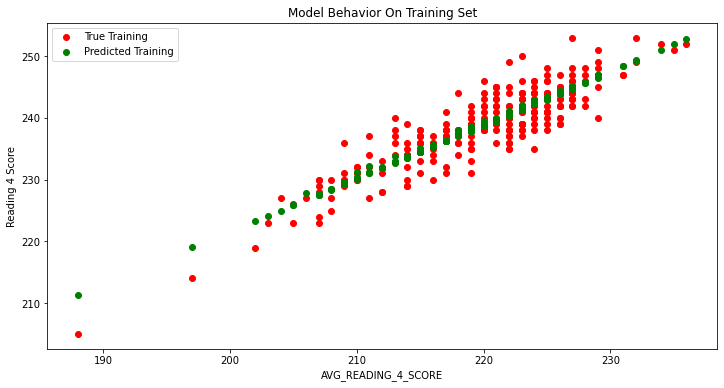

In [22]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

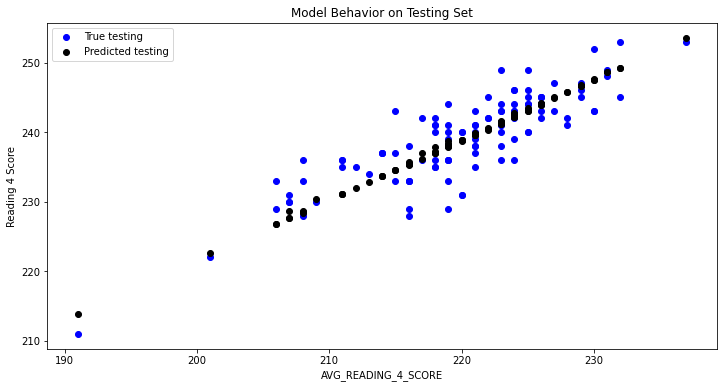

In [24]:
col_name = "AVG_READING_4_SCORE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

In the study, we explore several potential factors that might influence the grade 4th math score. Overall we find that the reading score has positive relationship with the grade_4th_math score. In the machine learning model, we let the X = 'ENROLL_4','expense_per_stu','AVG_READING_4_SCORE', and y = df.loc[X.index]['AVG_MATH_4_SCORE']